# 로지스틱 회귀분석
- 종속 변수가 이항분포를 따르고, 모수 $\mu$가 독립변수 x에 의존
- y는 0 ~ N
$$
p(y \mid x) = Bin(y \mid \mu(x), N)
$$

## 1. 시그모이드 함수
- 베르누이 확률분포의 모수 $\mu$를 x의 함수로 가정
- 함수 $\mu$는 x에 대한 선형함수 0~1 사이 값만 나올 수 있도록 시그모이드 함수 f 사용

$$
0 \le \mu = f(w^Tx) \le 1
$$

- 시그모이드 함수는 모든 실수 종속 변수에 대해,
    - (a, b) 사이의 한정된 값을 가짐
    - 항상 0 또는 양의 기울기 가짐


- 시그 모이드 함수 종류
    - 로지스틱 함수 Logistic function    
    $$
    logistic(z) = \sigma (z) = \dfrac{1}{1 + \exp (-z)}
    $$
    
    - 하이퍼볼릭 탄젠트 함수 Hyperbolic tangent
    
    $$
    2 \sigma (2x) -1
    $$
    
    - 오차 함수(Error Function, Logit)
    
    $$
    erf(z) = \dfrac{2}{\sqrt \pi} \int_0^z e^{-t^2} dt
    $$


## 2. 로지스틱 함수
$$
P(Y=1 \mid X=x) = \mu(\beta_0 + \beta_1 x) = \mu(w^Tx) = logistic(z) = \dfrac{1}{1 + \exp(-z)}
$$
### - 1 확률($\mu$) vs 0 확률($1-\mu$): odds ratio
- $0 \le \text{odds ratio}(\mu) \le 1$
$$
\text{odds ratio}(\mu) = \dfrac{\mu}{1-\mu}
$$

### - logit 함수:
- 0 ~ 1 사이인 $\mu \,\,\, \rightarrow \,\,\,\, \text{odds ratio & logit함수} \,\,\,\, \rightarrow \,\,\,\, -\infty \le z \le \infty$

$$
z = logit(\mu) = log \cdot odds \, ratio (\mu) = \log (\dfrac{\mu}{1-\mu})
$$

### - logistic 함수:
- logit 함수의 역함수
$$
logistic(z) = \mu(z) = \dfrac{1}{1+ \exp (-z)}
$$

## 2.1 선형판별 함수
- z는 판별함수(decision function) 역할
- $z=w^Tx \rightarrow \mu=0.5$
- $z > 0 \rightarrow \mu > 0.5$
- $z < 0 \rightarrow \mu < 0.5$

## 2.2 로지스틱 모형 모수 추정
- 모수 w
- 종속변수 y가 베르누이 확률 변수로 가정
$$
p(y \mid x) = Bern(y \mid \mu(x;w)) \\
\mu(x;w) = \dfrac{1}{1+exp(-w^Tx)}
$$

- 데이터 표본 $\{x_i, y_i\}_{1:N}$일 경우 Log Likelihood LL
$$
LL = \log \prod_{i=1}^N \mu_i(x_i;w)^{y_i}(1-\mu_i (x_i;w))^{1-y_i}
$$
- LL을 w로 미분 $\rightarrow$ Gradient=0 되게 하는 w
$$
\dfrac{\partial \text{LL}}{\partial w} = \sum_{i=1}^N(y_i - \mu_i(x_i;w))x_i
$$


## 2.2.1 수치적 최적화
- 가능도 함수 $\text{LL}$ 최대화
    - 목적함수 $\text{J} = -\text{LL}$ 를 최소화

$$
w^* = \arg \min_w \text{-LL}
$$
- SGD
    - Gradient Vector
$$
g_k = -\dfrac{d\text{LL}}{dw}
$$

    - step size
$$
\begin{eqnarray}
w_{k+1} 
&=& w_k - \eta_k g_k \\
&=& w_k + \eta_k \sum_{i=1}^k(y_i - \mu_i(x_i;w_k))x_i
\end{eqnarray}
$$

## 2.3 정규화
- 로지스틱 회귀에서 과최적화 방지위해 ridge, lasso, elastic net방식의 정규화 페널티 추가
- 페널티 추가된 목적함수

$$
eg. \, \text{J}' = -\text{LL} + \lambda w^Tw 
$$

## 2.4 로지스틱 회귀 계수 검정
$$H_0: w_k = 0$$
## 2.5 성능측정
- 일종의 오차
- 좌측: y=1, 우측: y=0
- $G^2$는 현재 deviance
- $G_0^2$은 귀무모형(null model)로 측정한 deviance: x에 상관없이 동일하게 y에측

$$
R_{pseudo}^2 = 1 - \dfrac{G^2}{G_0^2} \\
G^2 = 2 \sum_{i=1}^N \left( y_i \log \dfrac{y_i}{\hat{y}_i} + (1-y_i)\log \dfrac{1-y_i}{1-\hat{y}_i} \right) \\
\hat{y}_i = \mu(x_i)
$$


## 3. 로지스틱 회귀를 사용한 회귀분석

### 이진분류의 예

In [23]:
data = sm.datasets.get_rdataset("MedGPA", package="Stat2Data")
df = data.data
df.tail()

,Accept,Acceptance,Sex,BCPM,GPA,VR,PS,WS,BS,MCAT,Apps
50,D,0,M,2.41,2.72,8,8,8.0,8,32,7
51,D,0,M,3.51,3.56,11,8,6.0,9,34,6
52,A,1,F,3.43,3.48,7,10,7.0,10,34,14
53,D,0,M,2.61,2.80,7,5,NaN,6,18,6
54,D,0,M,3.36,3.44,11,11,8.0,9,39,1


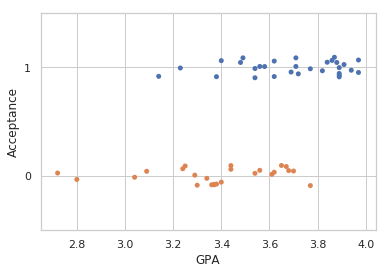

In [35]:
sns.stripplot("GPA", "Acceptance", data=df, jitter=True, orient='h', order=[1, 0])
plt.grid(True)
plt.show()

In [38]:
f = "Acceptance ~ Sex + BCPM + GPA + VR + PS + WS + BS + Apps"
model = sm.Logit.from_formula(f,  df)
result = model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.280736
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:             Acceptance   No. Observations:                   54
Model:                          Logit   Df Residuals:                       45
Method:                           MLE   Df Model:                            8
Date:                Mon, 03 Dec 2018   Pseudo R-squ.:                  0.5913
Time:                        18:54:30   Log-Likelihood:                -15.160
converged:                       True   LL-Null:                       -37.096
                                        LLR p-value:                 6.014e-07
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -46.6414     15.600     -2.990      0.003     -77.216     -16.067
Sex[T.M]      -2.2835      1.

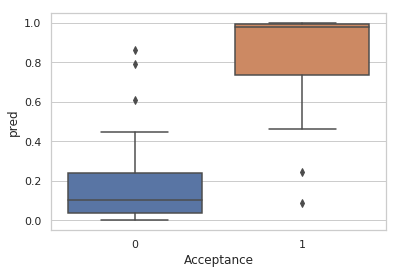

In [39]:
# 지금 모델에서 설명안되는 것이 0: 3개, 1: 2개)
df["pred"] = result.predict(df)
sns.boxplot(x="Acceptance", y="pred", data=df)
plt.show()

 ### 회귀분석의 예 1)

In [7]:
## Log-Likelihood: LL 최대값
## LL null: LL 하한값
## p-value: 하한이 나와야 하는데, 최대값이 나왔을 확률
%matplotlib inline
from sklearn.datasets import make_classification
import statsmodels.api as sm
X0, y = make_classification(n_features=1, n_redundant=0, n_informative=1,
                           n_clusters_per_class=1, random_state=4)
X = sm.add_constant(X0)
logit_mod = sm.Logit(y, X)
logit_res = logit_mod.fit()
print(logit_res.summary())

Optimization terminated successfully.
         Current function value: 0.160844
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  100
Model:                          Logit   Df Residuals:                       98
Method:                           MLE   Df Model:                            1
Date:                Mon, 03 Dec 2018   Pseudo R-squ.:                  0.7679
Time:                        18:35:04   Log-Likelihood:                -16.084
converged:                       True   LL-Null:                       -69.295
                                        LLR p-value:                 5.963e-25
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2515      0.477      0.527      0.598      -0.683       1.186
x1             4.2382      0.

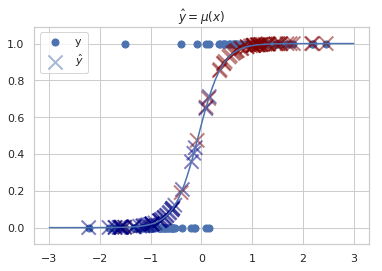

In [21]:
xx = np.linspace(-3, 3, 100)
mu = logit_res.predict(sm.add_constant(xx))
plt.plot(xx, mu)
plt.scatter(X0, y, label="y", marker='o', s=50)
plt.scatter(X0, logit_res.predict(X), label=r"$\hat{y}$", marker='x', c=y,
           s=200, lw=2, alpha=0.5, cmap=mpl.cm.jet)
plt.title(r"$\hat{y} = \mu(x)$")
plt.legend()
plt.show()

### 회귀분석의 예 2)

In [61]:
data = sm.datasets.get_rdataset("womensrole", package="HSAUR")
df = data.data
df["agree_ratio"] = df.agree / (df.agree + df.disagree)
df.tail()

,education,sex,agree,disagree,agree_ratio
37,16,Female,13,115,0.101562
38,17,Female,3,28,0.096774
39,18,Female,0,21,0.000000
40,19,Female,1,2,0.333333
41,20,Female,2,4,0.333333


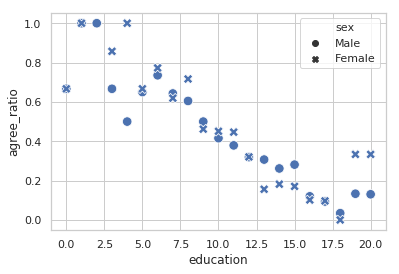

In [62]:
sns.scatterplot(x="education", y="agree_ratio", style="sex", data=df, s=90)
plt.grid(True)
plt.show()

In [63]:
f = "agree_ratio ~ education + sex"
model = sm.Logit.from_formula(f, df)
result = model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.448292
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:            agree_ratio   No. Observations:                   41
Model:                          Logit   Df Residuals:                       38
Method:                           MLE   Df Model:                            2
Date:                Mon, 03 Dec 2018   Pseudo R-squ.:                  0.3435
Time:                        19:04:44   Log-Likelihood:                -18.380
converged:                       True   LL-Null:                       -27.997
                                        LLR p-value:                 6.660e-05
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       2.0442      0.889      2.299      0.022       0.302       3.787
sex[T.Male]    -0.1968    

In [64]:
# 성별 제외
f = "agree_ratio ~ education"
model = sm.Logit.from_formula(f, df)
result = model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.449186
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:            agree_ratio   No. Observations:                   41
Model:                          Logit   Df Residuals:                       39
Method:                           MLE   Df Model:                            1
Date:                Mon, 03 Dec 2018   Pseudo R-squ.:                  0.3422
Time:                        19:05:30   Log-Likelihood:                -18.417
converged:                       True   LL-Null:                       -27.997
                                        LLR p-value:                 1.202e-05
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.9345      0.781      2.478      0.013       0.405       3.464
education     -0.2117      0.

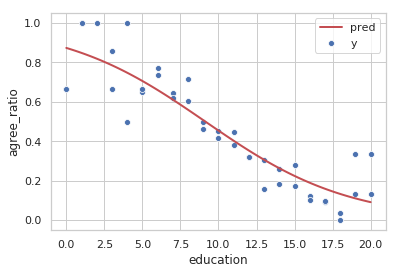

In [68]:
sns.scatterplot(x="education", y="agree_ratio", data=df, label="y")
xx = np.linspace(0, 20, 100)
df_p = pd.DataFrame({"education": xx})
plt.plot(xx, result.predict(df_p), "r-", lw=2, label="pred")
plt.legend()
plt.show()